[View in Colaboratory](https://colab.research.google.com/github/ronykroy/gensim/blob/master/Grid_search_and_LDA.ipynb)

In [1]:
! pip install -U spacy

    100% |████████████████████████████████| 17.6MB 2.2MB/s 
Requirement not upgraded as not directly required: numpy>=1.7 in /usr/local/lib/python3.6/dist-packages (from spacy) (1.14.3)
    100% |████████████████████████████████| 92kB 18.0MB/s 
    100% |████████████████████████████████| 1.2MB 18.9MB/s 
    100% |████████████████████████████████| 51kB 18.1MB/s 
    100% |████████████████████████████████| 194kB 20.3MB/s 
    100% |████████████████████████████████| 71kB 20.5MB/s 
    100% |████████████████████████████████| 604kB 17.5MB/s 
    100% |████████████████████████████████| 51kB 18.9MB/s 
    100% |████████████████████████████████| 389kB 13.6MB/s 
Requirement not upgraded as not directly required: six<2.0.0,>=1.10.0 in /usr/local/lib/python3.6/dist-packages (from thinc<6.11.0,>=6.10.1->spacy) (1.11.0)
Requirement not upgraded as not directly required: termcolor in /usr/local/lib/python3.6/dist-packages (from thinc<6.11.0,>=6.10.1->spacy) (1.1.0)
    100% |████████████████████████

 \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done
  Stored in directory: /content/.cache/pip/wheels/fb/00/28/75c85d5135e7d9a100639137d1847d41e914ed16c962d467e4
  Running setup.py bdist_wheel for murmurhash ... - \ | / done
  Stored in directory: /content/.cache/pip/wheels/b8/94/a4/f69f8664cdc1098603df44771b7fec5fd1b3d8364cdd83f512
  Running setup.py bdist_wheel for cymem ... - \ done
  Stored in directory: /content/.cache/pip/wheels/55/8d/4a/f6328252aa2aaec0b1cb906fd96a1566d77f0f67701071ad13
  Running setup.py bdist_wheel for preshed ... - \ | / - \ | done
  Stored in directory: /content/.cache/pip/wheels/8f/85/06/2d132fb649a6bbcab22487e4147880a55b0dd0f4b18fdfd6b5
  Running setup.py bdist_wheel for thin

 / - \ | / done
  Stored in directory: /content/.cache/pip/wheels/f8/b1/86/c92e4d36b690208fff8471711b85eaa6bc6d19860a86199a09
  Running setup.py bdist_wheel for msgpack-python ... - \ | / done
  Stored in directory: /content/.cache/pip/wheels/d5/de/86/7fa56fda12511be47ea0808f3502bc879df4e63ab168ec0406
Successfully built spacy murmurhash cymem preshed thinc pathlib ujson dill regex wrapt cytoolz msgpack-python


In [2]:
! pip install gensim

    100% |████████████████████████████████| 22.6MB 2.0MB/s 
    100% |████████████████████████████████| 1.4MB 12.5MB/s 
    100% |████████████████████████████████| 133kB 20.8MB/s 
    100% |████████████████████████████████| 61kB 17.2MB/s 
    100% |████████████████████████████████| 4.2MB 7.3MB/s 
    100% |████████████████████████████████| 552kB 22.9MB/s 
  Running setup.py bdist_wheel for smart-open ... - done
  Stored in directory: /content/.cache/pip/wheels/b1/9e/7d/bb3d3b55c597e72617140a0638c06382a5f17283881eae163e
  Running setup.py bdist_wheel for bz2file ... - done
  Stored in directory: /content/.cache/pip/wheels/81/75/d6/e1317bf09bf1af5a30befc2a007869fa6e1f516b8f7c591cb9
Successfully built smart-open bz2file


In [3]:
!python3 -m spacy download en
# we are using spacy's to process the text.. they have good stuff.. for produciton.. environment...

    100% |████████████████████████████████| 37.4MB 46.1MB/s 
  Running setup.py install for en-core-web-sm ... - \ | done

    Linking successful
    /usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/en

    You can now load the model via spacy.load('en')



In [4]:
! pip install pyLDAvis

    100% |████████████████████████████████| 1.6MB 6.3MB/s 
    100% |████████████████████████████████| 184kB 10.2MB/s 
    100% |████████████████████████████████| 174kB 9.9MB/s 
    100% |████████████████████████████████| 194kB 10.2MB/s 
    100% |████████████████████████████████| 51kB 15.7MB/s 
    100% |████████████████████████████████| 92kB 14.4MB/s 
  Running setup.py bdist_wheel for pyLDAvis ... - \ done
  Stored in directory: /content/.cache/pip/wheels/cd/1d/21/c481d9aee816995f3543a23878e15e63de7b574635ab8586fe
Successfully built pyLDAvis


In [0]:
import numpy as np
import pandas as pd
import re, nltk, spacy, gensim

# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

The same news groupd data as used last time.. 

In [6]:
# Import Dataset
df = pd.read_json('https://raw.githubusercontent.com/selva86/datasets/master/newsgroups.json')
print(df.target_names.unique())



['rec.autos' 'comp.sys.mac.hardware' 'rec.motorcycles' 'misc.forsale'
 'comp.os.ms-windows.misc' 'alt.atheism' 'comp.graphics'
 'rec.sport.baseball' 'rec.sport.hockey' 'sci.electronics' 'sci.space'
 'talk.politics.misc' 'sci.med' 'talk.politics.mideast'
 'soc.religion.christian' 'comp.windows.x' 'comp.sys.ibm.pc.hardware'
 'talk.politics.guns' 'talk.religion.misc' 'sci.crypt']


In [7]:
df.head(15)

,content,target,target_names
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,rec.autos
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
10,From: irwin@cmptrc.lonestar.org (Irwin Arnstei...,8,rec.motorcycles
100,From: tchen@magnus.acs.ohio-state.edu (Tsung-K...,6,misc.forsale
1000,From: dabl2@nlm.nih.gov (Don A.B. Lindbergh)\n...,2,comp.os.ms-windows.misc
10000,From: a207706@moe.dseg.ti.com (Robert Loper)\n...,7,rec.autos
10001,From: kimman@magnus.acs.ohio-state.edu (Kim Ri...,6,misc.forsale
10002,From: kwilson@casbah.acns.nwu.edu (Kirtley Wil...,2,comp.os.ms-windows.misc
10003,Subject: Re: Don't more innocents die without ...,0,alt.atheism
10004,From: livesey@solntze.wpd.sgi.com (Jon Livesey...,0,alt.atheism


Generic data cleaning and email removal..

In [8]:
# Convert to list
data = df.content.values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:1])

<input>:4: DeprecationWarning: invalid escape sequence \S
<input>:4: DeprecationWarning: invalid escape sequence \S
<input>:4: DeprecationWarning: invalid escape sequence \S
<input>:4: DeprecationWarning: invalid escape sequence \S
<input>:4: DeprecationWarning: invalid escape sequence \S
<input>:4: DeprecationWarning: invalid escape sequence \S
<input>:4: DeprecationWarning: invalid escape sequence \S
<input>:4: DeprecationWarning: invalid escape sequence \S
<input>:4: DeprecationWarning: invalid escape sequence \S
<input>:4: DeprecationWarning: invalid escape sequence \S
<input>:7: DeprecationWarning: invalid escape sequence \s
<input>:4: DeprecationWarning: invalid escape sequence \S
<input>:7: DeprecationWarning: invalid escape sequence \s
<input>:4: DeprecationWarning: invalid escape sequence \S
<input>:7: DeprecationWarning: invalid escape sequence \s
<input>:4: DeprecationWarning: invalid escape sequence \S
<input>:7: DeprecationWarning: invalid escape sequence \s
<input>:4: Dep

['From: (wheres my thing) Subject: WHAT car is this!? Nntp-Posting-Host: '
 'rac3.wam.umd.edu Organization: University of Maryland, College Park Lines: '
 '15 I was wondering if anyone out there could enlighten me on this car I saw '
 'the other day. It was a 2-door sports car, looked to be from the late 60s/ '
 'early 70s. It was called a Bricklin. The doors were really small. In '
 'addition, the front bumper was separate from the rest of the body. This is '
 'all I know. If anyone can tellme a model name, engine specs, years of '
 'production, where this car is made, history, or whatever info you have on '
 'this funky looking car, please e-mail. Thanks, - IL ---- brought to you by '
 'your neighborhood Lerxst ---- ']


Tokenization: reduce sentences to words.. we are setting deacc to true for removing punctuation

In [9]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['from', 'wheres', 'my', 'thing', 'subject', 'what', 'car', 'is', 'this', 'nntp', 'posting', 'host', 'rac', 'wam', 'umd', 'edu', 'organization', 'university', 'of', 'maryland', 'college', 'park', 'lines', 'was', 'wondering', 'if', 'anyone', 'out', 'there', 'could', 'enlighten', 'me', 'on', 'this', 'car', 'saw', 'the', 'other', 'day', 'it', 'was', 'door', 'sports', 'car', 'looked', 'to', 'be', 'from', 'the', 'late', 'early', 'it', 'was', 'called', 'bricklin', 'the', 'doors', 'were', 'really', 'small', 'in', 'addition', 'the', 'front', 'bumper', 'was', 'separate', 'from', 'the', 'rest', 'of', 'the', 'body', 'this', 'is', 'all', 'know', 'if', 'anyone', 'can', 'tellme', 'model', 'name', 'engine', 'specs', 'years', 'of', 'production', 'where', 'this', 'car', 'is', 'made', 'history', 'or', 'whatever', 'info', 'you', 'have', 'on', 'this', 'funky', 'looking', 'car', 'please', 'mail', 'thanks', 'il', 'brought', 'to', 'you', 'by', 'your', 'neighborhood', 'lerxst']]


Lemmatization: this is where spacy comes into the picture for the first time..  
Spacy's lemmatization can reduce running to run.. and apparently best to good to [advertised.. ] :)

In [11]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# Run in terminal: python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only Noun, Adj, Verb, Adverb
data_lemmatized = lemmatization(data_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:2])

/usr/local/lib/python3.6/dist-packages/msgpack_numpy.py:84: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr)).reshape(obj[b'shape'])
/usr/local/lib/python3.6/dist-packages/msgpack_numpy.py:88: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr))[0]
/usr/local/lib/python3.6/dist-packages/msgpack_numpy.py:84: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr)).reshape(obj[b'shape'])
/usr/local/lib/python3.6/dist-packages/msgpack_numpy.py:84: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr)).reshape(obj[b'shape'])
/usr/local/lib/python3.6/dist-packages/msgpack_numpy

['where s  thing subject what car be nntp post host rac wam umd edu organization university maryland college park line be wonder anyone out there could enlighten car see other day be door sport car look be late early be call bricklin door be really small addition front bumper be separate rest body be know anyone can tellme model name engine spec year production where car be make history whatev info have funky look car mail thank bring  neighborhood lerxst', 'guy subject clock poll final call summary final call si clock report keyword acceleration clock upgrade article shelley qvfo innc organization university washington line nntp post host carson washington edu fair number brave soul who upgrade  si clock oscillator have share  experience poll send brief message detail  experience procedure top speed attain cpu rat speed add card adapter heat sink hour usage day floppy disk functionality floppy be especially request will be summarize next day so add network knowledge base have do clock

LDA modelling needs a word matrix as the input...  
Count vectorizer does that.. alternatives would have been tfidf vecotrizer

In [0]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=10,                        # minimum reqd occurences of a word 
                             stop_words='english',             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                             # max_features=50000,             # max number of uniq words
                            )

data_vectorized = vectorizer.fit_transform(data_lemmatized)

In [13]:
#Checking the sparsity of the data
# Materialize the sparse data
data_dense = data_vectorized.todense()

# Compute Sparsicity = Percentage of Non-Zero cells
print("sparsity: ", ((data_dense > 0).sum()/data_dense.size)*100, "%")

sparsity:  0.7758875693652992 %


Sparsity : the percentage of non-zero datapoints in the document-word matrix, that is data_vectorized. in the case above.. 

Make sure the machine is free enough for this step:  
n_jobs used all the avl cpus in -1 setting

%env JOBLIB_TEMP_FOLDER=/tmp

is the setting thats brought in to over come the OSError: [Errno 28] No space left on device error thats throwsn while training the model

In [17]:
%env JOBLIB_TEMP_FOLDER=/tmp

env: JOBLIB_TEMP_FOLDER=/tmp


In [20]:
# Build LDA Model
lda_model = LatentDirichletAllocation(#n_topics=20, Depreciation warning..?
                                      n_components =20 ,# Number of topics
                                      max_iter=10,               # Max learning iterations
                                      learning_method='online',   
                                      random_state=100,          # Random state
                                      batch_size = 128, #space issues..?            # n docs in each learning iter
                                      evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

print(lda_model)  # Model attributes

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=20, n_jobs=-1, n_topics=None, perp_tol=0.1,
             random_state=100, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)


MOdel dignosis/performance stats: the rules of thumb hold.. even if the cales are negative.. 

In [21]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(data_vectorized))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(data_vectorized))

# See model parameters
pprint(lda_model.get_params())

Log Likelihood:  -9955549.232330883
Perplexity:  2046.0045976748436
{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'online',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 20,
 'n_jobs': -1,
 'n_topics': None,
 'perp_tol': 0.1,
 'random_state': 100,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}


Running the actual grid search: on lda for n_components and LR decay

In [22]:
# Define Search Param
search_params = {'n_components': [10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}

# Init the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(data_vectorized)

/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning wa

/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning wa

GridSearchCV(cv=None, error_score='raise',
       estimator=LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=10, n_jobs=1,
             n_topics=None, perp_tol=0.1, random_state=None,
             topic_word_prior=None, total_samples=1000000.0, verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_components': [10, 15, 20, 25, 30], 'learning_decay': [0.5, 0.7, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Getting the best model parameters from the variable in the above cell... 

In [23]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

Best Model's Params:  {'learning_decay': 0.7, 'n_components': 10}
Best Log Likelihood Score:  -3421590.9465265092
Model Perplexity:  2066.3036603181326


Plotting the log-likelihood scores against num_topics, clearly shows number of topics = 10 has better scores.  
And learning_decay of 0.7 outperforms both 0.5 and 0.9. (not sure though.. the graph shows that these 2 swap as topics number get closer to 10)

Even though we know that the dataset has 20 distinct topics to start with, some topics could share common keywords.   
For example, ‘alt.atheism’ and ‘soc.religion.christian’ can have a lot of common words.   
Same with ‘rec.motorcycles’ and ‘rec.autos’,  
‘comp.sys.ibm.pc.hardware’ and ‘comp.sys.mac.hardware’,   
you get the idea... :P

You can get a finer model.. by running the CV grid search with smaller increments in the range of 10 to 15  
or what ever you have got... 

PLotting ... 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


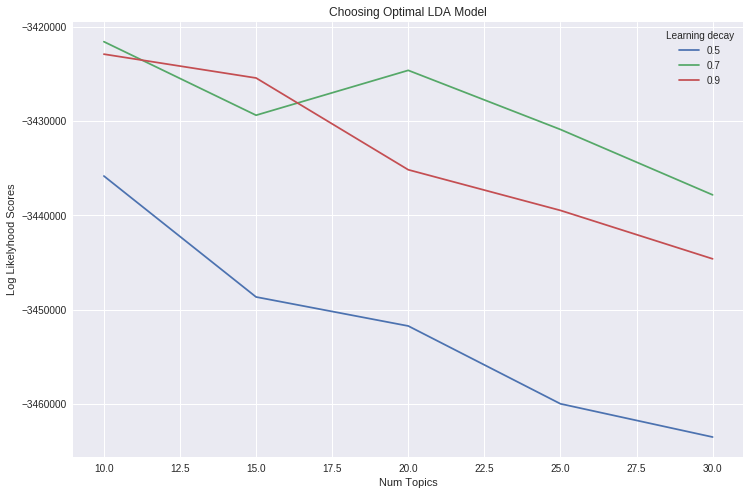

In [24]:
# Get Log Likelyhoods from Grid Search Output
n_topics = [10, 15, 20, 25, 30]
log_likelyhoods_5 = [round(gscore.mean_validation_score) for gscore in model.grid_scores_ if gscore.parameters['learning_decay']==0.5]
log_likelyhoods_7 = [round(gscore.mean_validation_score) for gscore in model.grid_scores_ if gscore.parameters['learning_decay']==0.7]
log_likelyhoods_9 = [round(gscore.mean_validation_score) for gscore in model.grid_scores_ if gscore.parameters['learning_decay']==0.9]

# Show graph
plt.figure(figsize=(12, 8))
plt.plot(n_topics, log_likelyhoods_5, label='0.5')
plt.plot(n_topics, log_likelyhoods_7, label='0.7')
plt.plot(n_topics, log_likelyhoods_9, label='0.9')
plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelyhood Scores")
plt.legend(title='Learning decay', loc='best')
plt.show()

Check out the dominant topic in each document.. 

In [27]:
# Create Document - Topic Matrix
lda_output = best_lda_model.transform(data_vectorized)

# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)] #.n_topics deprecated..?

# index names
docnames = ["Doc" + str(i) for i in range(len(data))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,dominant_topic
Doc0,0,0,0,0.98,0,0,0,0,0,0,3
Doc1,0.44,0.1,0,0.28,0,0,0,0.11,0,0.05,0
Doc2,0.06,0,0,0.93,0,0,0,0,0,0,3
Doc3,0.22,0.66,0,0,0,0.12,0,0,0,0,1
Doc4,0.62,0.36,0,0,0,0,0,0,0,0,0
Doc5,0.07,0,0,0.9,0.02,0,0,0,0,0,3
Doc6,0,0,0,0.46,0,0.52,0,0,0,0,5
Doc7,0,0.64,0,0.35,0,0,0,0,0,0,1
Doc8,0,0,0.49,0.32,0,0,0.18,0,0,0,2
Doc9,0,0,0.02,0,0.33,0,0.65,0,0,0,6


Check out topic distribution across documents

In [28]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

,Topic Num,Num Documents
0,3,3396
1,0,2576
2,2,1221
3,6,1083
4,4,890
5,1,695
6,8,521
7,7,363
8,5,307
9,9,262


Visualizing the LDA model using py LDA vis...

In [29]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(best_lda_model, data_vectorized, vectorizer, mds='tsne')
panel

PreparedData(topic_coordinates=            Freq  cluster  topics          x          y
topic                                                  
3      18.272246        1       1  56.036175  64.459961
6      15.777916        1       2  -9.592753  84.410973
2      14.500210        1       3 -56.596088 -30.354931
0      12.773521        1       4   4.723895 -60.765053
1      10.702227        1       5  40.108688  -3.405071
4       8.252819        1       6  64.092407 -49.590405
8       6.107995        1       7 -10.050320  -9.031050
7       5.362377        1       8  89.158287  14.472734
9       4.325721        1       9 -48.800491  33.968555
5       3.924967        1      10  10.192900  37.145947, topic_info=     Category          Freq          Term         Total  loglift  logprob
term                                                                     
5343  Default   4361.000000           max   4361.000000  30.0000  30.0000
3666  Default   2587.000000           god   2587.000000  29.0000  29.0000
4766  Default   2203.000000           key   2203.000000  28.0000  28.0000
3276  Default   3044.000000          file   3044.000000  27.0000  27.0000
8135  Default   2012.000000         space   2012.000000  26.0000  26.0000
9569  Default   3068.000000        window   3068.000000  25.0000  25.0000
3534  Default   1971.000000          game   1971.000000  24.0000  24.0000
9218  Default   8895.000000           use   8895.000000  23.0000  23.0000
8640  Default   1547.000000          team   1547.000000  22.0000  22.0000
475   Default   1357.000000      armenian   1357.000000  21.0000  21.0000
1467  Default   1588.000000     christian   1588.000000  20.0000  20.0000
6837  Default   2360.000000       program   2360.000000  19.0000  19.0000
6431  Default   5932.000000        people   5932.000000  18.0000  18.0000
6581  Default   1450.000000          play   1450.000000  17.0000  17.0000
7636  Default   7071.000000           say   7071.000000  16.0000  16.0000
3693  Default   1971.000000    government   1971.000000  15.0000  15.0000
1451  Default   1463.000000          chip   1463.000000  14.0000  14.0000
2678  Default   2465.000000         drive   2465.000000  13.0000  13.0000
3790  Default   1672.000000           gun   1672.000000  12.0000  12.0000
7591  Default    944.000000          sale    944.000000  11.0000  11.0000
6166  Default  11274.000000  organization  11274.000000  10.0000  10.0000
1266  Default   1741.000000           car   1741.000000   9.0000   9.0000
5921  Default   4739.000000          nntp   4739.000000   8.0000   8.0000
1269  Default   1583.000000          card   1583.000000   7.0000   7.0000
4078  Default   4958.000000          host   4958.000000   6.0000   6.0000
5048  Default  13017.000000          line  13017.000000   5.0000   5.0000
8400  Default  12203.000000       subject  12203.000000   4.0000   4.0000
4200  Default   1305.000000         image   1305.000000   3.0000   3.0000
9566  Default   1543.000000           win   1543.000000   2.0000   2.0000
9709  Default   3998.000000          year   3998.000000   1.0000   1.0000
...       ...           ...           ...           ...      ...      ...
7877  Topic10    206.407753      shipping    216.634098   3.1895  -5.5147
9587  Topic10    401.599358          wire    440.923097   3.1444  -4.8491
6213  Topic10    178.430992        outlet    193.726617   3.1556  -5.6604
1388  Topic10    199.004029       channel    217.907263   3.1471  -5.5512
3980  Topic10    136.671578       hewlett    152.316977   3.1294  -5.9270
6081  Topic10    311.742505          ohio    403.420174   2.9800  -5.1024
6773  Topic10    656.565036         price    985.113054   2.8321  -4.3576
6265  Topic10    134.644713       packard    158.446218   3.0750  -5.9419
7752  Topic10    476.981026          sell    935.419663   2.5643  -4.6771
6072  Topic10    419.178680         offer    833.722393   2.5502  -4.8063
2959  Topic10    198.712994     equipment    287.770128   2.8675  -5.5527
1192  Topic10    235.636567  

Check out the topic keywords..   
i.e the keywords that make contribute to a topic the most.. 

In [30]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(best_lda_model.components_)

# Assign Column and Index
df_topic_keywords.columns = vectorizer.get_feature_names()
df_topic_keywords.index = topicnames

# View
df_topic_keywords.head()


,aaa,aaron,abandon,abbreviation,abc,abide,ability,able,abolish,abomination,...,zion,zionism,zionist,zip,zisfein,zone,zoology,zoom,zubov,zurich
Topic0,0.100005,0.100051,0.100021,0.113447,0.100017,0.100002,23.528395,291.939399,0.100001,0.100002,...,0.100030,0.100000,0.100001,23.267284,0.100000,13.509867,0.100008,9.331024,0.100000,0.100103
Topic1,0.100006,0.100036,0.100085,5.756816,0.100050,0.100007,7.204031,15.315156,0.100004,0.100021,...,0.100050,0.100004,0.100001,151.007035,0.100001,0.100025,82.649585,17.606305,0.100000,0.100043
Topic2,0.100005,25.898162,23.760555,0.100003,0.100015,89.497800,1.845210,144.656231,38.761525,17.683057,...,0.100126,70.704765,79.249974,0.100056,0.100001,81.360227,0.100012,0.100024,0.100000,0.100005
Topic3,64.303445,66.449944,0.100011,11.384068,83.686995,0.100008,52.841844,147.364501,0.100009,0.100130,...,0.100053,0.100013,0.100003,0.100027,0.100002,21.915672,0.100008,0.100012,0.100004,0.100009
Topic4,0.100001,11.553382,0.100045,0.100006,0.100005,0.100016,21.891417,48.433904,19.460761,0.100080,...,0.100134,0.100007,0.100011,0.100005,0.100000,0.100004,0.100001,0.100002,0.100000,0.100001


Getting extracting the top 15 keywords in a given topic.. 

In [31]:
# Show top n keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=best_lda_model, n_words=15)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,line,subject,window,organization,use,drive,problem,post,write,card,host,nntp,work,know,thank
Topic 1,file,program,use,image,include,available,information,software,list,send,ftp,source,version,mail,package
Topic 2,people,say,gun,state,right,government,law,kill,write,know,article,come,war,president,make
Topic 3,line,organization,subject,write,post,article,university,host,nntp,good,just,car,year,edu,think
Topic 4,god,christian,say,believe,write,people,know,subject,religion,line,church,bible,man,come,life
Topic 5,max,sale,price,use,line,subject,sell,power,good,offer,organization,wire,bhj,circuit,buy
Topic 6,think,people,make,write,good,say,use,article,thing,just,know,point,time,problem,way
Topic 7,space,nasa,launch,research,center,food,year,earth,water,bank,orbit,organization,science,gordon,satellite
Topic 8,key,use,chip,encryption,clipper,line,government,subject,organization,phone,security,public,technology,bit,law
Topic 9,armenian,team,game,play,turkish,hockey,player,win,season,nhl,armenia,goal,year,league,turk


Predicting the topics for a new hithereto unseen piece of text..  
The process for that is... 
sent_to_words() –> lemmatization() –> vectorizer.transform() –> best_lda_model.transform()  

sent_to_words() : convert sentence to words   : tokenization basically used the simple preprocess method/funciotn in spacy
lemmatization() : Lemmatization: running to run.. and best to good (spacy is good enough for this and thats awesome)
    vectorizer: is an instance of count vecorizer in this case: can be TFidf vectorizer too 
vectorizer.transform()  :   transforms an input documetn to a document term matrix which is the format that LDA generally accepts
best_lda_model.transform() : the LDA model then transforms the output of the previous step.. for the new doc.. to give an output..  

which is the topic distribution matrix for the document

In [32]:
# Define function to predict topic for a given text document.
nlp = spacy.load('en', disable=['parser', 'ner'])

def predict_topic(text, nlp=nlp): # where is the nlp used..? or is it jus tloaded.. because the lemmatizaiton definition uses the spacy thing in its defn.
    global sent_to_words
    global lemmatization

    # Step 1: Clean with simple_preprocess
    mytext_2 = list(sent_to_words(text))

    # Step 2: Lemmatize
    mytext_3 = lemmatization(mytext_2, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

    # Step 3: Vectorize transform
    mytext_4 = vectorizer.transform(mytext_3)

    # Step 4: LDA Transform
    topic_probability_scores = best_lda_model.transform(mytext_4)
    topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores), :].values.tolist()
    return topic, topic_probability_scores

# Predict the topic
mytext = ["Some text about christianity and bible"]
topic, prob_scores = predict_topic(text = mytext)
print(topic)

['god', 'christian', 'say', 'believe', 'write', 'people', 'know', 'subject', 'religion', 'line', 'church', 'bible', 'man', 'come', 'life']


You can cluster the documents based on similarity..   
N = 15 cos 15 was thought to be optimal number of topics for this. 

In [33]:
# Construct the k-means clusters
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=15, random_state=100).fit_predict(lda_output)

# Build the Singular Value Decomposition(SVD) model
svd_model = TruncatedSVD(n_components=2)  # 2 components
lda_output_svd = svd_model.fit_transform(lda_output)

# X and Y axes of the plot using SVD decomposition
x = lda_output_svd[:, 0]
y = lda_output_svd[:, 1]

# Weights for the 15 columns of lda_output, for each component
print("Component's weights: \n", np.round(svd_model.components_, 2))

# Percentage of total information in 'lda_output' explained by the two components
print("Perc of Variance Explained: \n", np.round(svd_model.explained_variance_ratio_, 2))

Component's weights: 
 [[ 0.44  0.18  0.16  0.81  0.1   0.1   0.24  0.09  0.09  0.08]
 [ 0.86  0.17 -0.09 -0.46 -0.04  0.03 -0.06 -0.02  0.   -0.05]]
Perc of Variance Explained: 
 [0.08 0.33]


and plot it.. 

Text(0.5,1,'Segregation of Topic Clusters')

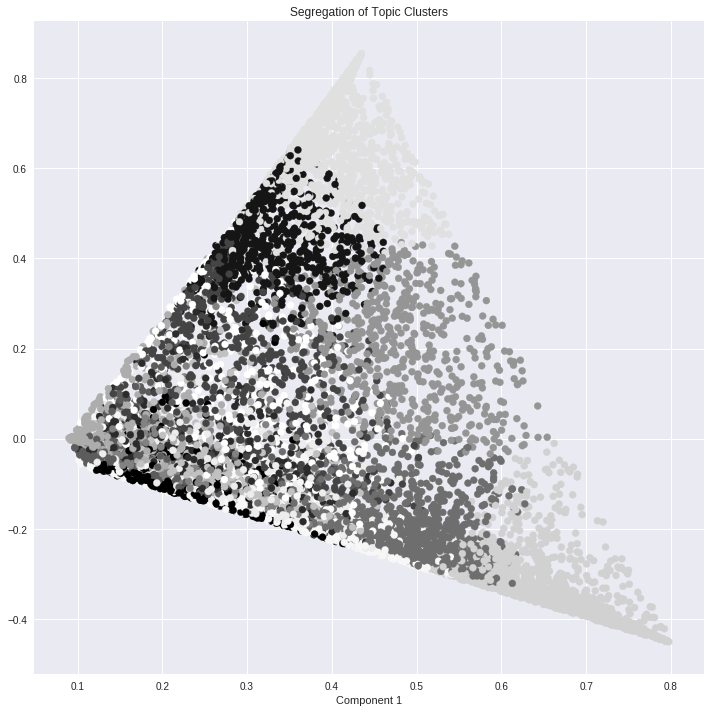

In [34]:
# Plot
plt.figure(figsize=(12, 12))
plt.scatter(x, y, c=clusters)
plt.xlabel('Component 2')
plt.xlabel('Component 1')
plt.title("Segregation of Topic Clusters", )

Given the probaility of topics for a given document (using predict_topic()),   
compute the euclidean distance with the probability scores of all other documents.  
The most similar documents are the ones with the smallest distance

In [0]:
from sklearn.metrics.pairwise import euclidean_distances

nlp = spacy.load('en', disable=['parser', 'ner'])

def similar_documents(text, doc_topic_probs, documents = data, nlp=nlp, top_n=5, verbose=False):
    topic, x  = predict_topic(text)
    dists = euclidean_distances(x.reshape(1, -1), doc_topic_probs)[0]
    doc_ids = np.argsort(dists)[:top_n]
    if verbose:        
        print("Topic KeyWords: ", topic)
        print("Topic Prob Scores of text: ", np.round(x, 1))
        print("Most Similar Doc's Probs:  ", np.round(doc_topic_probs[doc_ids], 1))
    return doc_ids, np.take(documents, doc_ids)

In [36]:
# Get similar documents
mytext = ["Some text about christianity and bible"]
doc_ids, docs = similar_documents(text=mytext, doc_topic_probs=lda_output, documents = data, top_n=1, verbose=True)
print('\n', docs[0][:500])

Topic KeyWords:  ['god', 'christian', 'say', 'believe', 'write', 'people', 'know', 'subject', 'religion', 'line', 'church', 'bible', 'man', 'come', 'life']
Topic Prob Scores of text:  [[0.  0.  0.  0.  0.8 0.  0.  0.  0.  0. ]]
Most Similar Doc's Probs:   [[0.  0.  0.  0.  0.8 0.  0.1 0.1 0.  0. ]]

 From: (Lucio de Re) Subject: A fundamental contradiction (was: A visit from JWs) Reply-To: Organization: MegaByte Digital Telecommunications Lines: 35 writes: >"Will" is "self-determination". In other words, God created conscious >beings who have the ability to choose between moral choices independently >of God. All "will", therefore, is "free will". The above is probably not the most representative paragraph, but I thought Id hop on, anyway... What strikes me as self-contradicting in the fable 


In [37]:
2+2

4